In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd

import matplotlib.pyplot as plt
import plotly_express as px

In [2]:
gdf = gpd.read_file("data/malmo-pop.shp")
gdf.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,...,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,...,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,"POLYGON ((373380.287 6160661.365, 373382.480 6..."
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,...,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,"POLYGON ((372667.079 6159991.971, 372653.152 6..."
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,...,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,"POLYGON ((372812.733 6158498.565, 372817.194 6..."
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,...,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,"POLYGON ((374168.622 6160181.233, 374169.100 6..."
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,...,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,"POLYGON ((375219.802 6160462.505, 375274.357 6..."


## Choropleth Map

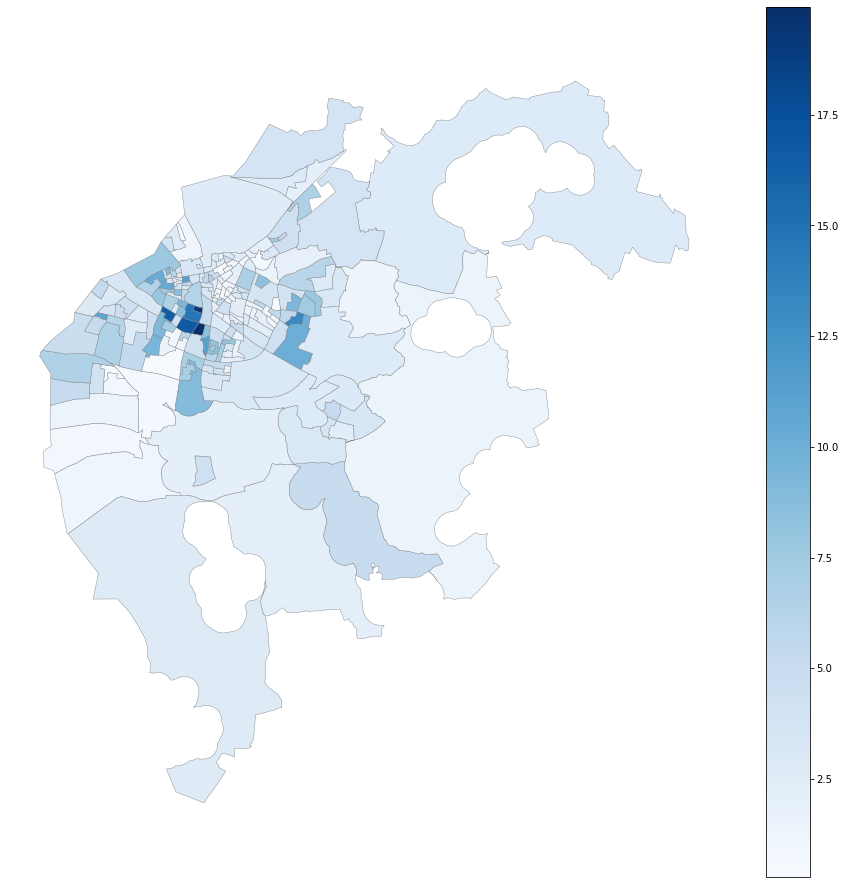

In [51]:
gdf["Age_80_norm"] = (gdf["Age80_w"] / gdf["Total"]) * 100
fig, ax = plt.subplots(figsize=(16,16))
gdf.plot(ax=ax, column="Age_80_norm", cmap="Blues",edgecolor="grey", linewidth=0.4, legend=True)
ax.axis("off")
plt.axis('equal')
plt.show()

## Static Bubble Maps - Geopandas

In [10]:
gdf_points = gdf.copy()
gdf_points['geometry'] = gdf_points['geometry'].centroid
gdf_points.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,...,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry,Age_80_norm
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,...,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,POINT (373736.130 6160844.324),19.931940
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,...,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,POINT (372932.457 6160165.211),1.337920
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,...,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,POINT (373183.207 6158866.154),7.193396
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,...,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,POINT (374515.204 6160556.319),4.626866
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,...,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,POINT (375533.769 6160531.143),1.659751


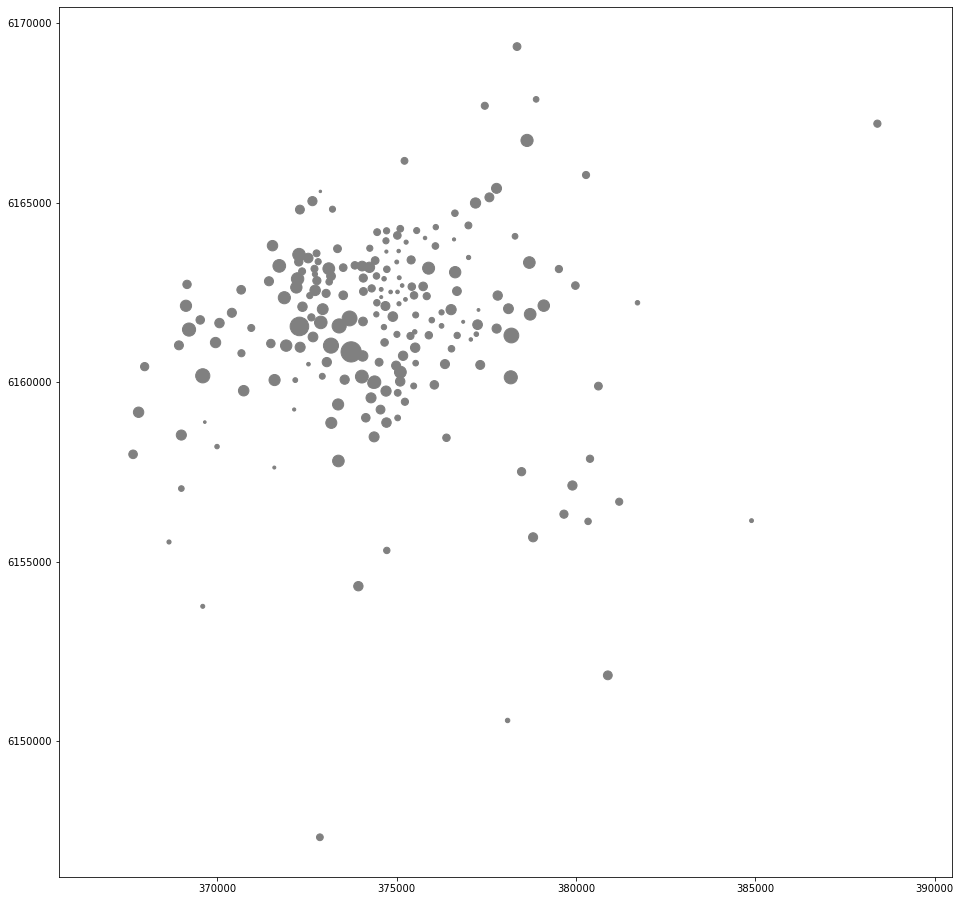

In [62]:
fig, ax = plt.subplots(figsize=(16,16))
gdf_points.plot(ax=ax,color="grey", markersize="Age80_w")
#ax.axis("off")
plt.axis('equal')
plt.show()

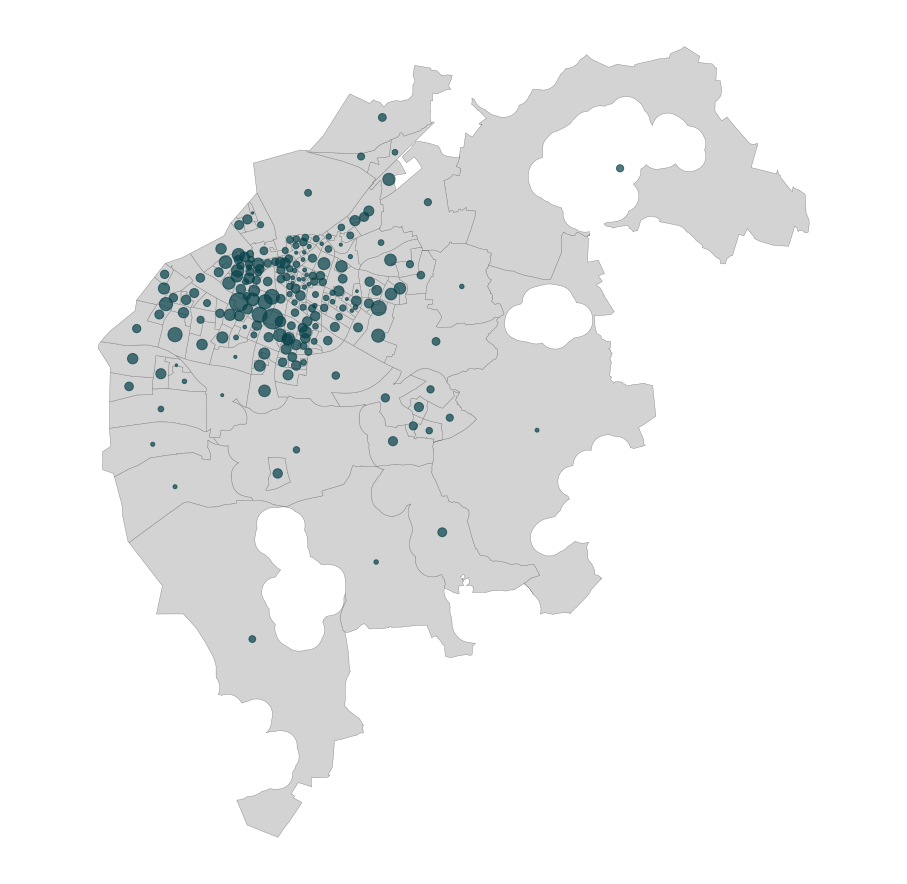

In [63]:
fig, ax = plt.subplots(figsize=(16,16))
gdf.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4)
gdf_points.plot(ax=ax,color="#07424A", markersize="Age80_w",alpha=0.7, categorical=False, legend=True  )

ax.axis("off")
plt.axis('equal')
plt.show()

## Interactive Bubble maps - Plotly Express

In [33]:
gdf_points.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
gdf_points_4326 = gdf_points.to_crs("EPSG:4326")

In [50]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(gdf_points_4326, 
                        lat=gdf_points_4326.geometry.y, 
                        lon=gdf_points_4326.geometry.x, 
                        size="Age80_w", 
                        color="Total", 
                        hover_name = "Age80_w",
                        color_continuous_scale=px.colors.colorbrewer.Reds, size_max=15, zoom=10)
fig.show()

In [47]:
px.colors.colorbrewer.swatches()